# Part 1. Getting Started- Load Packages

In [ ]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-p7d0ip3u
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-p7d0ip3u
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-ysvy6xu2/pyfolio_5f35442050094b44b4b6a1a80ffe7eb2
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-ysvy6xu2/pyfolio_5f35442050094b44b4b6a1a80ffe7eb2
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-ysvy6xu2/elegantrl_698ea15e1da84c79a49ea1faf9365558
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-ysvy6xu2/elegantrl_698ea15e1da84c79a49ea1faf9365558


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl import config
from finrl import config_tickers
from finrl.config import INDICATORS
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
#from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
#from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [ ]:
from env_reverse import StockTradingEnv

In [ ]:
from model_with_reverse_env_ppo import DRLAgent,DRLEnsembleAgent

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


# Part 2. Download Data

In [ ]:
df = YahooDownloader(start_date = '2009-04-01',
                     end_date = '2021-06-01',
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.308903,589372000,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477928,10850100,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772777,27701800,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850744,9288800,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820398,15308300,CAT,2


In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.308903,589372000,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477928,10850100,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772777,27701800,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850744,9288800,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820398,15308300,CAT,2


In [ ]:
len(df.tic.unique())

30

# Part 3: Preprocess Data

In [ ]:
df.tic.value_counts()

AAPL    3062
AMGN    3062
WMT     3062
WBA     3062
VZ      3062
V       3062
UNH     3062
TRV     3062
PG      3062
NKE     3062
MSFT    3062
MRK     3062
MMM     3062
MCD     3062
KO      3062
JPM     3062
JNJ     3062
INTC    3062
IBM     3062
HON     3062
HD      3062
GS      3062
DIS     3062
CVX     3062
CSCO    3062
CRM     3062
CAT     3062
BA      3062
AXP     3062
DOW      554
Name: tic, dtype: int64

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


# Part 4. Design Environment

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
    
}

# Part 5: Run the Model

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2009-04-01'
train_end = '2019-04-01'
val_test_start = '2019-04-01'
val_test_end = '2021-06-01'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  176.6598501240417
======Model training from:  2009-04-01 to  2019-04-02
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device
Logging to tensorboard_log/ppo/ppo_126_5
---------------------------------
| time/              |          |
|    fps             | 59       |
|    iterations      | 1        |
|    time_elapsed    | 34       |
|    total_timesteps | 2048     |
| train/             |          |
|    reward          | 76.19133 |
---------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 67          |
|    iterations           | 2           |
|    time_elapsed         | 60          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015076021 |
|    clip_fraction        | 0.232       |
|    cli

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,PPO Sharpe,PPO REVERSE Sharpe
0,126,2019-04-02,2019-07-02,PPO,0.296354,-0.062274
1,189,2019-07-02,2019-10-01,PPO with reverse action space,-0.281791,0.085151
2,252,2019-10-01,2019-12-31,PPO,0.65689,0.017496
3,315,2019-12-31,2020-04-01,PPO with reverse action space,-0.448622,0.024273
4,378,2020-04-01,2020-07-01,PPO,0.309308,-0.07426
5,441,2020-07-01,2020-09-30,PPO,-0.01487,-0.067973
6,504,2020-09-30,2020-12-30,PPO,0.414813,-0.016096


# Part 6: Backtest Our Strategy

In [ ]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))


    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.517545628103949


In [ ]:
print(df_account_value)


     account_value        date  daily_return    datadate
0     1.000000e+06  2019-07-02           NaN  2019-07-02
1     1.001119e+06  2019-07-03      0.001119  2019-07-03
2     1.001416e+06  2019-07-05      0.000296  2019-07-05
3     9.924811e+05  2019-07-08     -0.008922  2019-07-08
4     9.900437e+05  2019-07-09     -0.002456  2019-07-09
..             ...         ...           ...         ...
436   7.049128e+05  2021-03-25      0.009395  2021-03-25
437   7.148533e+05  2021-03-26      0.014102  2021-03-26
438   7.212423e+05  2021-03-29      0.008937  2021-03-29
439   7.157984e+05  2021-03-30     -0.007548  2021-03-30
440   7.174590e+05  2021-03-31      0.002320  2021-03-31

[441 rows x 4 columns]


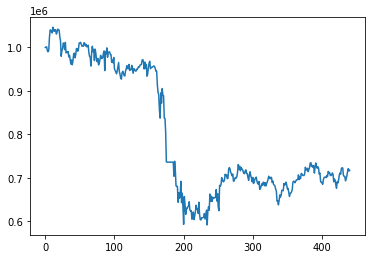

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

# 6.1 BackTestStats

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.172823
Cumulative returns    -0.282541
Annual volatility      0.287661
Sharpe ratio          -0.517546
Calmar ratio          -0.397806
Stability              0.633979
Max drawdown          -0.434441
Omega ratio            0.903147
Sortino ratio         -0.716779
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.815078
Daily value at risk   -0.036833
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (440, 8)
Annual return          0.128211
Cumulative returns     0.234455
Annual volatility      0.290930
Sharpe ratio           0.562175
Calmar ratio           0.345712
Stability              0.231729
Max drawdown          -0.370862
Omega ratio            1.129890
Sortino ratio          0.772718
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.805960
Daily value at risk   -0.036005
dtype: float64


# 6.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (440, 8)


Start date,2019-07-02
End date,2021-03-31
Total months,21
,Backtest
Annual return,-17.282%
Cumulative returns,-28.254%
Annual volatility,28.766%
Sharpe ratio,-0.52
Calmar ratio,-0.40
Stability,0.63
Max drawdown,-43.444%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.44,2019-07-18,2020-06-05,NaT,NaN
1,1.14,2019-07-05,2019-07-09,2019-07-11,5
2,0.68,2019-07-12,2019-07-17,2019-07-18,5
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.06%,-8.56%,10.76%


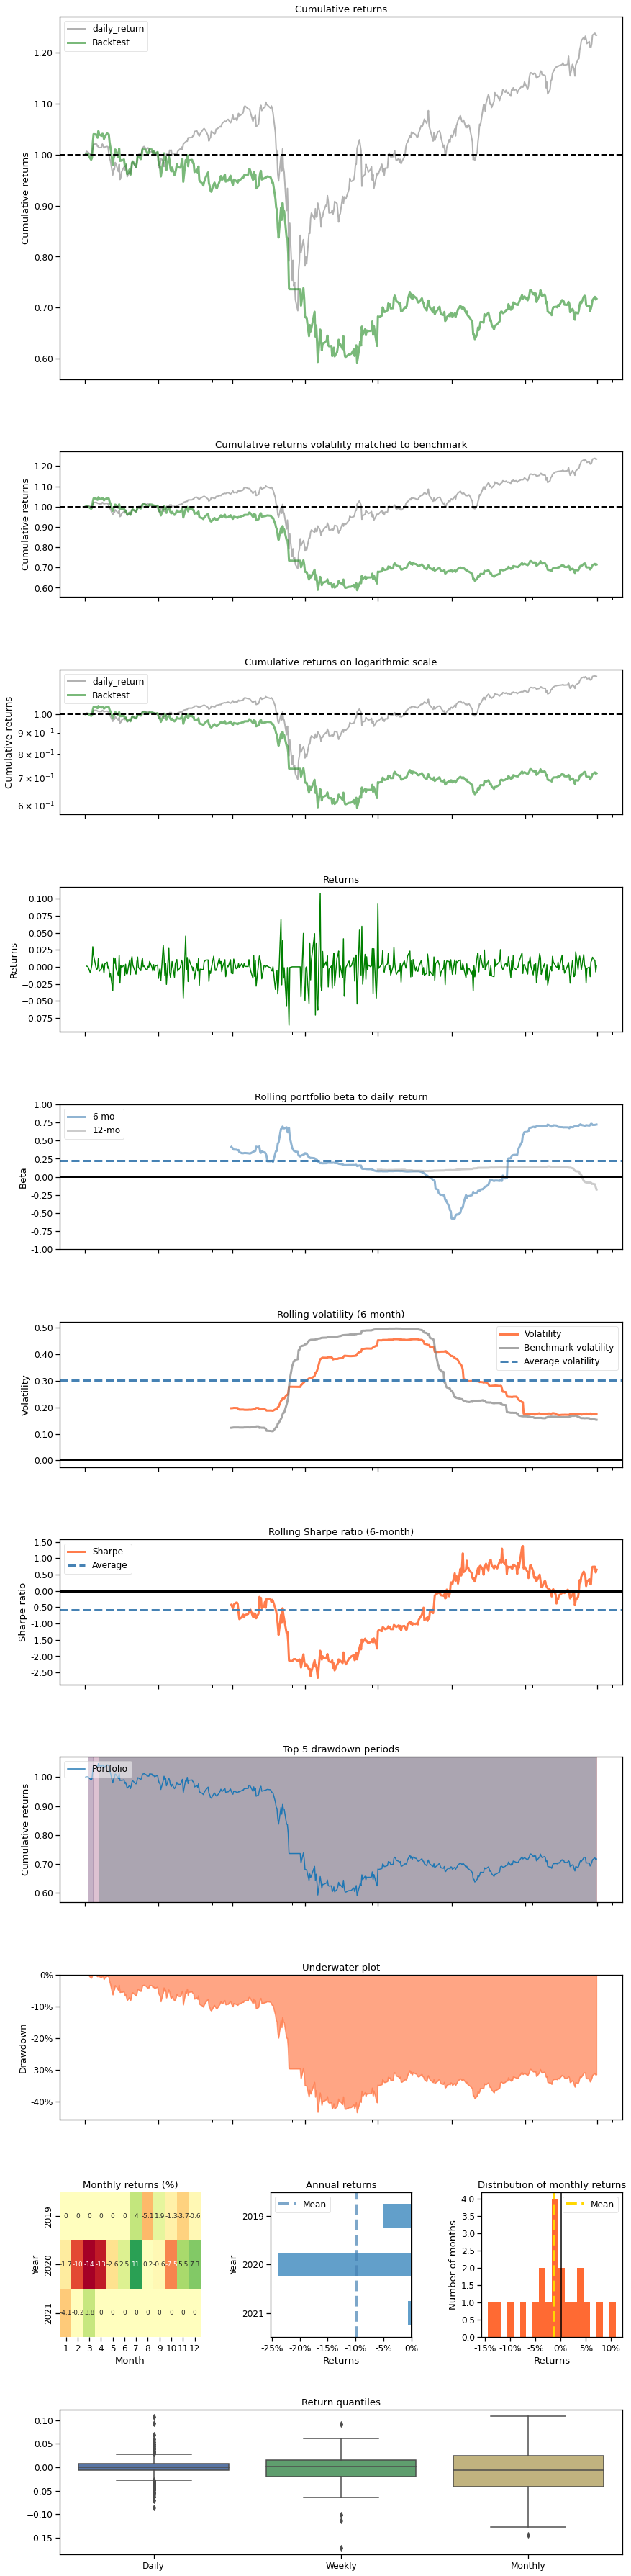

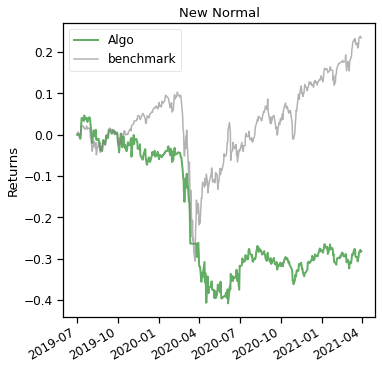

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])